In [20]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import plotly.graph_objects as go
import ruptures as rpt

In [21]:
folder_path = 'data'
def read_data(filename):
    accelerometer = pd.read_csv(os.path.join(folder_path, filename, 'Accelerometer.csv'),sep=';')
    accelerometer['Time (s)'] = pd.to_datetime(accelerometer['Time (s)'], unit='s')
    accelerometer =accelerometer.set_index('Time (s)')
    accelerometer = accelerometer.resample('2.5ms').mean()
    accelerometer.rename(columns={'Acceleration x (m/s^2)':'accelerometer_x','Acceleration y (m/s^2)':'accelerometer_y','Acceleration z (m/s^2)':'accelerometer_z'}, inplace=True)
    accelerometer =accelerometer[9000:-9000]
    accelerometer.reset_index(inplace=True)

    gyroscope = pd.read_csv(os.path.join(folder_path, filename,'Gyroscope.csv'),sep=';')
    gyroscope['Time (s)'] = pd.to_datetime(gyroscope['Time (s)'], unit='s')
    gyroscope =gyroscope.set_index('Time (s)')
    gyroscope = gyroscope.resample('2.5ms').mean()
    gyroscope.rename(columns={'Gyroscope x (rad/s)':'gyroscope_x','Gyroscope y (rad/s)':'gyroscope_y','Gyroscope z (rad/s)':'gyroscope_z'}, inplace=True)
    gyroscope = gyroscope[9000:-9000]
    gyroscope.reset_index(inplace=True)
    merged = pd.merge(accelerometer,gyroscope, on= 'Time (s)', how='inner')
    merged['Time (s)'] = merged['Time (s)'].dt.time
    return merged

In [22]:
lucas1 = read_data('lucas1')
nick1 = read_data('nick1')
till1= read_data('till1')

<Figure size 640x480 with 0 Axes>

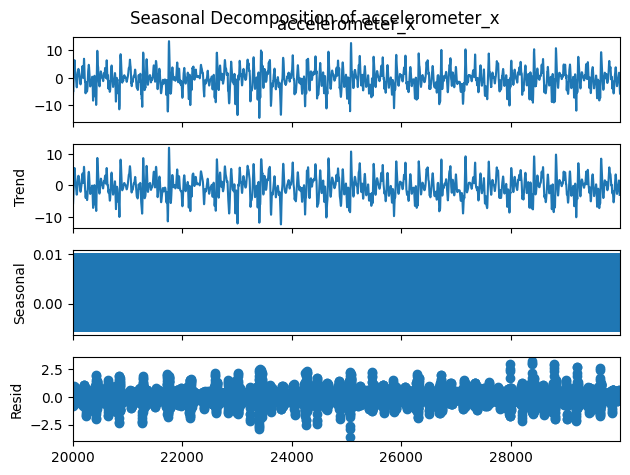

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dimensions = ['accelerometer_x']

# Dictionary to hold decomposition results
decomposition_results = {}
for dim in dimensions:
    decomposition = seasonal_decompose(nick1[dim][20000:30000], model='additive', period=12)
    decomposition_results[dim] = decomposition
    
    # Plot the decomposition
    plt.figure()
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {dim}')
    plt.show()



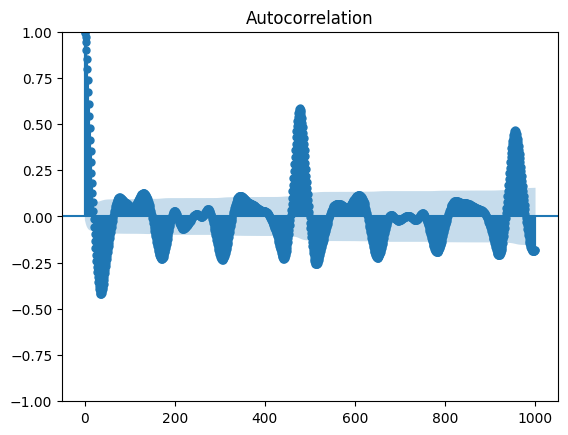

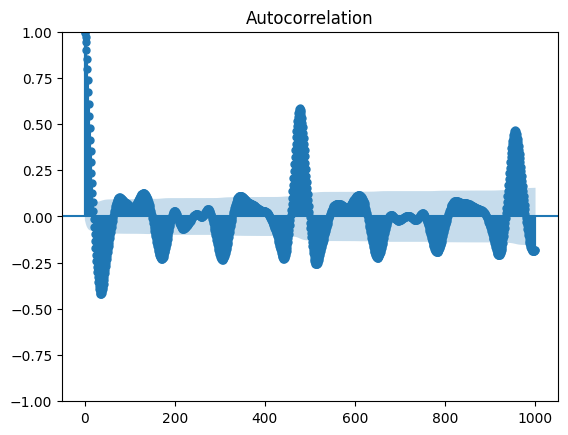

In [40]:
plot_acf(till1['accelerometer_x'][20000:30000], lags=1000)